# 상관성 분석

In [ ]:
# 필요한 패키지 임포트
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.display.float_format ='{:,.2f}'.format

In [ ]:
# https://www.kaggle.com/datasets/priyanshusahu23/winequality

# 데이터 불러오기
df = pd.read_csv("https://github.com/bigdata-young/230207_viz_practice/raw/main/wine-quality.csv")

# 데이터 샘플 확인
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# 피어슨 상관계수 산출
df.corr()
# 동일한 변수 간에는 상관계수 1, ~1 ~ 1 사이의 값
# 어떤 변수 간에 상관성이 높고 낮은지 확인 (문자형 변수를 제외하고 변수 간 상관관계를 계산)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,0.22,0.32,-0.11,0.30,-0.28,-0.33,0.46,-0.25,0.30,-0.10,-0.08
volatile acidity,0.22,1.00,-0.38,-0.20,0.38,-0.35,-0.41,0.27,0.26,0.23,-0.04,-0.27
citric acid,0.32,-0.38,1.00,0.14,0.04,0.13,0.20,0.10,-0.33,0.06,-0.01,0.09
residual sugar,-0.11,-0.20,0.14,1.00,-0.13,0.40,0.50,0.55,-0.27,-0.19,-0.36,-0.04
chlorides,0.30,0.38,0.04,-0.13,1.00,-0.20,-0.28,0.36,0.04,0.40,-0.26,-0.20
free sulfur dioxide,-0.28,-0.35,0.13,0.40,-0.20,1.00,0.72,0.03,-0.15,-0.19,-0.18,0.06
total sulfur dioxide,-0.33,-0.41,0.20,0.50,-0.28,0.72,1.00,0.03,-0.24,-0.28,-0.27,-0.04
density,0.46,0.27,0.10,0.55,0.36,0.03,0.03,1.00,0.01,0.26,-0.69,-0.31
pH,-0.25,0.26,-0.33,-0.27,0.04,-0.15,-0.24,0.01,1.00,0.19,0.12,0.02
sulphates,0.30,0.23,0.06,-0.19,0.40,-0.19,-0.28,0.26,0.19,1.00,-0.00,0.04


## 히트맵 시각화

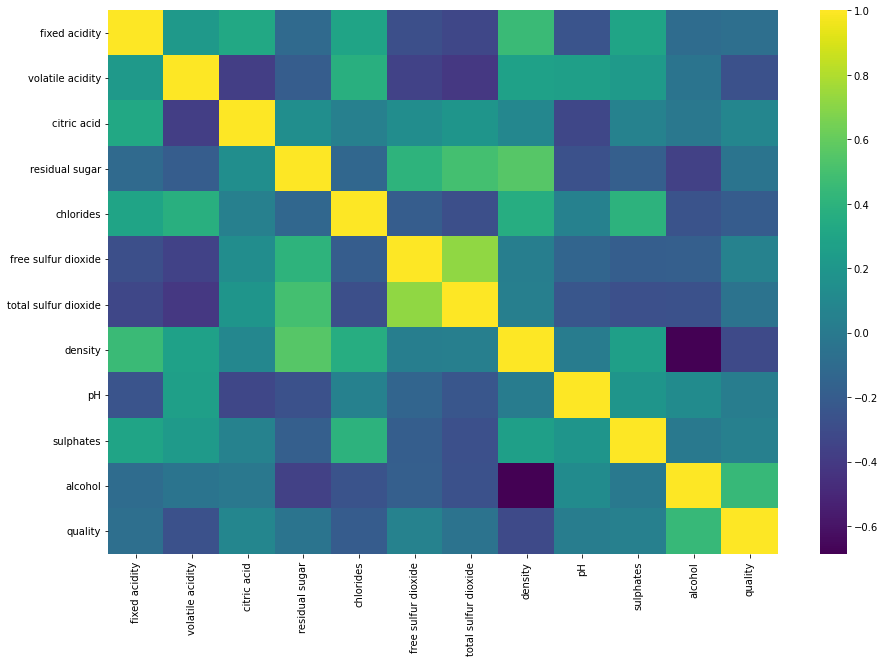

In [ ]:
# 상관계수 히트맵 시각화
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='viridis')
plt.show()

<Figure size 1080x720 with 0 Axes>

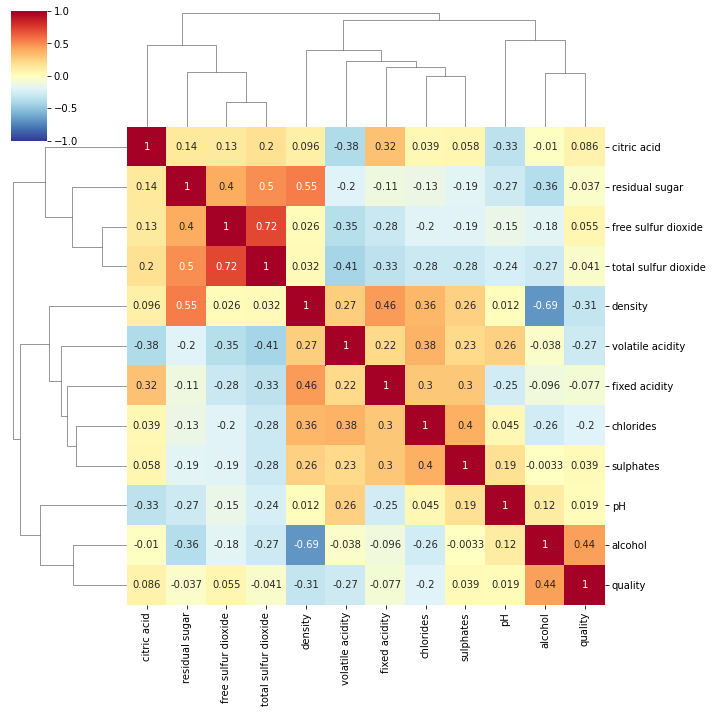

In [ ]:
# clustermap 히트맵 시각화
plt.figure(figsize=(15, 10))
sns.clustermap(df.corr(),
            annot = True,
            cmap='RdYlBu_r',
            vmin=-1, vmax=1
            )
plt.show() # 기존 히트맵에 상관성이 강한 변수들끼리 묶어서 표현

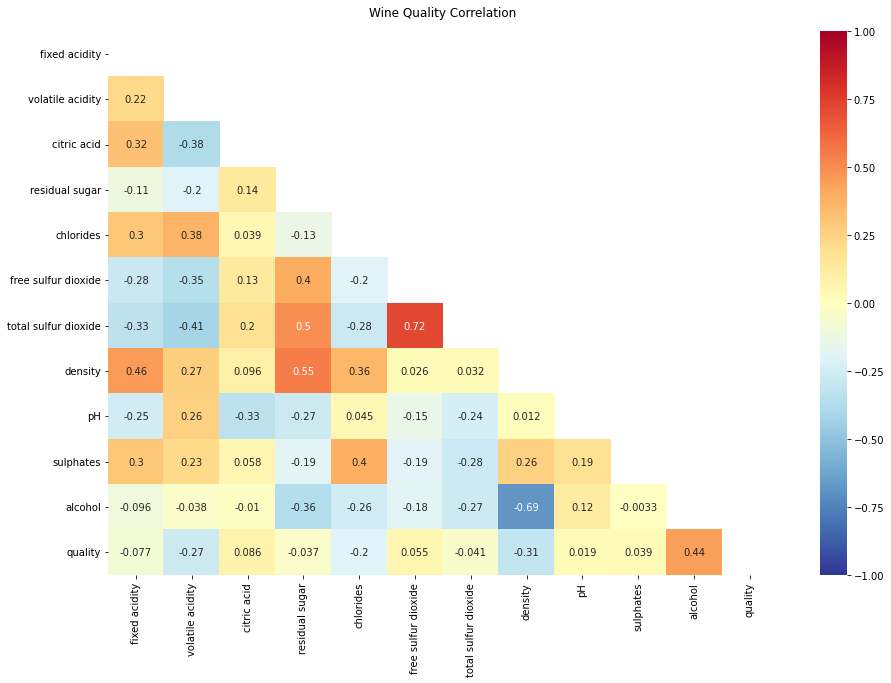

In [ ]:
# 중복 제거 히트맵 시각화
# 중복되는 부분을 제외(동일한 변수 조합이 두번씩 나오는)하여 가독성 높이기

# 매트릭스의 우측 상단을 모두 True인 1로, 하단을 False인 0으로 변환.
np.triu(np.ones_like(df.corr()))

# True/False mask 배열로 변환.
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

#  히트맵 그래프 생성
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), 
            mask=mask, 
            vmin=-1, 
            vmax = 1, 
            annot=True, 
            cmap="RdYlBu_r", 
            cbar = True)
ax.set_title('Wine Quality Correlation', pad = 15)
plt.show()

# 분포 시각화

* 트리맵 차트 : 구성 요소가 복잡한 질적 척도를 표현
    * 하나의 큰 사각형을 구성 요소의 비율에 따라 작은 사각형으로 쪼개어 분포를 표현
    * 트리맵 차트의 장점은 사각형 안에 더 작은 사각형을 포함시켜서 위제구조를 표현할 수 있다는 것
    * 예를 들어 의류 매장의 품목별 판매량 분포를 트리맵 차트로 표현한다면, '바지' 영역이 긴 바지와 반바지로 분리하여 구성
    * 이처럼 한정된 공간 안에서 많은 구성 요소들의 분포를 체계적으로 표현할 수 있음
    * 하지만 구성 요소들 간의 규모 차이가 크면 표현이 어려울 수 있다는 단점이 있음
* 와플 차트 : 와플처럼 일정한 네모난 조각들로 분포를 표현
    * 하지만 트리맵 차트처럼 위계구조를 표현하지는 못함

In [ ]:
# 필요한 패키지 설치 및 임포트
!pip install plotly -q
!pip install pywaffle -q
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from pywaffle import Waffle
plt.rcParams['figure.dpi'] = 300

In [ ]:
# https://www.kaggle.com/datasets/sewonghwang/six-countries-height-samples

# 데이터 불러오기
df = pd.read_csv("https://github.com/bigdata-young/230207_viz_practice/raw/main/six_countries_height_samples.csv")

# 데이터 샘플 확인
df.head()

,id,country,sex,height_cm
0,rhop00001,AUSTRALIA,man,189
1,rhop00002,AUSTRALIA,man,165
2,rhop00003,AUSTRALIA,man,189
3,rhop00004,AUSTRALIA,man,164
4,rhop00005,AUSTRALIA,man,192


## 트리맵 차트 시각화

In [ ]:
# 트리맵 차트용 데이터셋 전처리

df_ = df[['country', 'sex', 'height_cm']]
df_ = df_[df.height_cm >= 175]
# 국가, 성별 단위 신장 175cm 이상 카운팅
df_ = df_.groupby(['country','sex']).count().reset_index()

df_.head(10)

,country,sex,height_cm
0,AUSTRALIA,man,59
1,AUSTRALIA,woman,9
2,DENMARK,man,53
3,DENMARK,woman,6
4,ITALY,man,60
5,ITALY,woman,7
6,JAPAN,man,45
7,JAPAN,woman,1
8,KOREA,man,50
9,KOREA,woman,2


In [ ]:
fig = px.treemap(df_,
                 path=['sex','country'],
                 values='height_cm',
                 color='height_cm',
                 color_continuous_scale='viridis')
# 트리맵 차트는 위계구조를 표현하기 때문에 path 옵션으로 위계구조 순서별 칼럼을 넣어줌
# 우선 성별로 구분하고 그 안에서 국가별 분포를 표현하기 위해 sex, country 칼럼을 입력해줌
# 시각화된 트리맵 차트에서는 신장 175cm 이상 샘플의 비율을 나타내므로 남성-이탈리아의 비중에 가장 높고,
# 여성-일본의 비중이 가장 낮게 나온 것을 확인할 수 있음
fig.show()

## 와플차트 시각화

In [ ]:
# 와플차트 시각화를 위한 데이터 전처리

df2 = df[['country','height_cm']]
# 키 175 이상만 추출
df2=df2[df.height_cm >= 175]
df2 = df2.groupby('country').count().reset_index()

df2.head(10)

,country,height_cm
0,AUSTRALIA,68
1,DENMARK,59
2,ITALY,67
3,JAPAN,46
4,KOREA,52
5,TURKEY,61


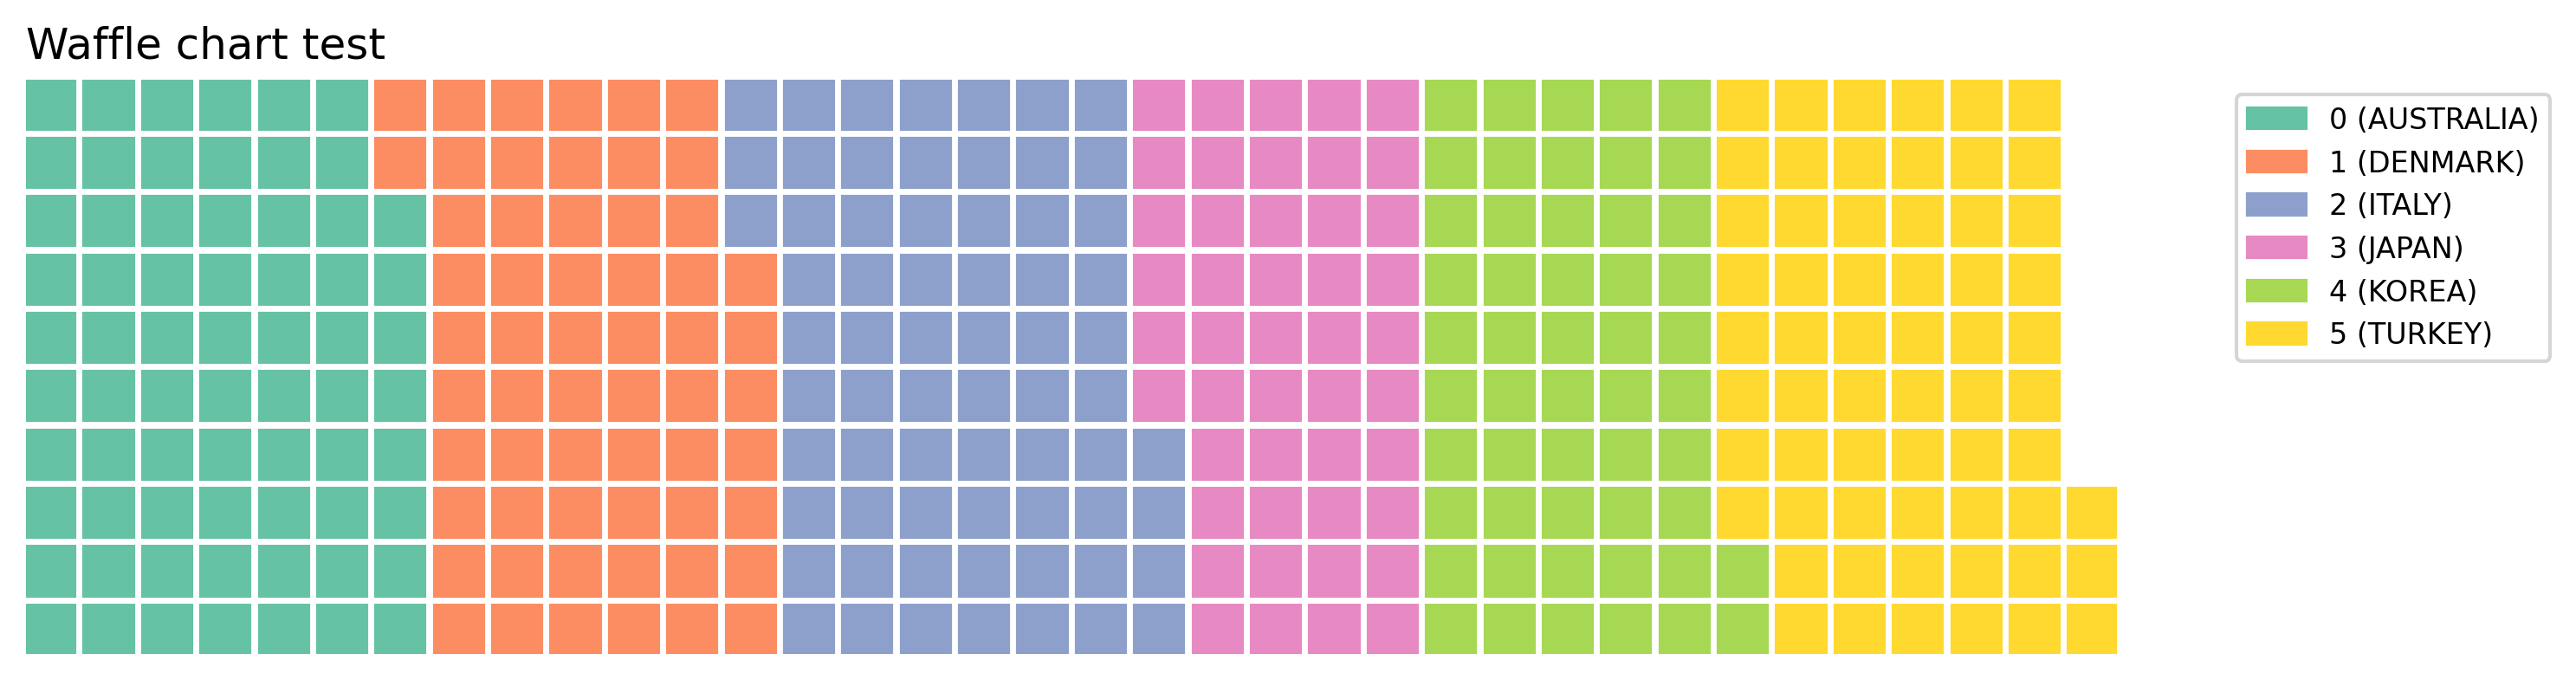

In [ ]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {
            'values': df2['height_cm'],
            'labels': ["{0} ({1})".format(n, v) for n, v in df2['country'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Waffle chart test', 'loc': 'left'}
        }
    },
    rows=10,
    figsize=(10, 10) 
)
# 각 국가의 비중이 작은 정사각형으로 표현
# rows 옵션을 통해 차트 형태를 조정 가능
plt.show()

# 공간 시각화

* 도트맵(Dot map) : 지리적 위치에 동일한 크기의 작은 점을 찍어서 해당 지역의 데이터 분포나 패턴을 표현하는 기법
    * 점 하나는 실제 하나를 뜻할 수도 있고 다른 단위의 크기를 나타낼 수도 있음
    * 도트맵은 시각적으로 데이터의 개요를 파악하는 데 유리하지만, 정확한 값을 전달하는 데에는 적합하지 않음
    * 이러한 단점을 보완하기 위해 축소해서 보면 숫자로 정확한 수치를 표현하고 확대하면 점으로 되도록 하는 기법을 사용하기도 함
* 버블맵(Bubble map) : 버블차트를 지도에 그대로 옮겨둔 것이라고 생각하면 됨
    * 데이터 값이 원의 크기로 표현되기 때문에 코로플레스맵보다 비율을 비교하는 데 효과적
    * 다만 버블맵은 지나치게 큰 버블이 다른 지역의 버블과 영역이 겹칠 수 있기 때문에 이를 잘 조절해야 함
* 코로플레스맵(Choropleth map) : 단계 구분도, 데이터 값의 크기에 따라 색상의 음영을 달리하여 해당 지역에 대한 값을 시각화하는 기법
    * 경우에 따라서 여러 색상을 혼합할 수 있으며, 투명도, 명도, 채도 등 다양하게 표현할 수 있음
    * 이 방법 역시 정확한 수치를 인지하고 비교하는 것이 어려움
    * 코로플레스맵은 작은 지역들에 비해 큰 지역이 강조되는 인상을 줄 수 있기 때문에 이 점을 유의해서 지도를 해석해야 함

In [ ]:
# 필요 패키지 임포트
!pip install folium -q
import folium
from folium import Marker
from folium import plugins
from folium import GeoJson
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go

plt.rcParams['figure.dpi'] = 300

In [ ]:
# 서울 스타벅스 지점 데이터 불러오기
# https://www.kaggle.com/datasets/sewonghwang/starbucks-seoul
df = pd.read_csv("https://github.com/bigdata-young/230207_viz_practice/raw/main/Starbucks_Seoul.csv")

# 지역 구분을 위한 json 파일 불러오기
!wget https://github.com/bigdata-young/230207_viz_practice/raw/main/Seoul_Gu.json
geo="Seoul_Gu.json" 

# 데이터 샘플 확인
df.head()

--2023-02-06 15:20:19--  https://github.com/bigdata-young/230207_viz_practice/raw/main/Seoul_Gu.json
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bigdata-young/230207_viz_practice/main/Seoul_Gu.json [following]
--2023-02-06 15:20:19--  https://raw.githubusercontent.com/bigdata-young/230207_viz_practice/main/Seoul_Gu.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29564 (29K) [text/plain]
Saving to: ‘Seoul_Gu.json’

Seoul_Gu.json       100%[===================>]  28.87K  --.-KB/s    in 0.002s  

2023-02-06 15:20:19 (12.4 MB/s) - ‘Seoul_Gu.json’ saved [29564/29564]



,name,address,gu_name,latitude,longitude
0,GS타워,서울특별시 강남구 논현로 508 (역삼동),강남구,37.50,127.04
1,SSG마켓도곡R,"서울특별시 강남구 언주로30길 57, 타워팰리스Ⅱ F 지하1층 (도곡동)",강남구,37.49,127.05
2,W-Mall,서울특별시 금천구 디지털로 188 (가산동),금천구,37.48,126.89
3,가든파이브,서울특별시 송파구 충민로 10 (문정동) 가든파이브툴,송파구,37.48,127.12
4,가락본동,서울특별시 송파구 송파대로30길 13 (가락동),송파구,37.49,127.12


## 기본 지도 시각화

In [ ]:
# 기본 지도 시각화 (서울의 위도, 경도 입력)
# location 옵션을 사용하여 나타내고자 하는 지역의 위도와 경도를 입력
# 처음 화면에서 어느 정도의 확대 수준으로 시각화할지는 zoom_start 옵션을 사용
m = folium.Map(location=[37.541, 126.986], zoom_start=12)
m

In [ ]:
# 지도 형태 변경
m = folium.Map(location=[37.541, 126.986], tiles='Stamen Toner', zoom_start=12)

# 원하는 좌표에 반경(radius) 표시 (남산)
folium.CircleMarker([37.5538, 126.9810],radius=50, 
                    popup='Laurelhurst Park', color='#3246cc', 
                    fill_color='#3246cc').add_to(m)

# 원하는 좌표에 포인트 표시 (남산)
folium.Marker([37.5538, 126.9810], popup='The Waterfront').add_to(m)
    
m

## 군집 마커 시각화

In [ ]:
# 서울 지도에 스타벅스 지점 수 시각화

m = folium.Map([37.541, 126.986], zoom_start=12 ,width="%100", height="%100")
locations = list(zip(df.latitude, df.longitude))
cluster = plugins.MarkerCluster(locations=locations,                     
               popups=df["name"].tolist())  # 각 구역에 존재하는 스타벅스 지점의 수를 숫자로 표현
m.add_child(cluster)
m # 지도를 더 축소하면 원들이 뭉쳐 표현되면서 숫자들이 합해짐 / 지도를 확대하면 원이 쪼개지다가 결국 하나의 핀으로 표현

## 도트맵 시각화

In [ ]:
# 서울 지도에 스타벅스 지점수 도드맵 시각화

m = folium.Map(location=[37.541, 126.986], zoom_start=12, width="%100", height="%100")
locations = list(zip(df.latitude, df.longitude))
for i in range(len(locations)):
    folium.CircleMarker(location=locations[i],radius=1).add_to(m)
m

## 버블맵 시각화

In [ ]:
# 서울 구 별 스타벅스 지점 수 집계 및 중심점 산출
df_m = df.groupby('gu_name').agg({'latitude':'mean',
                                  'longitude':'mean',
                                  'name':'count'}).reset_index()
df_m.head() # 버블맵은 특정한 지점에 지정된 수치의 값을 표현하기 때문에 기존 데이터를 구 단위로 집계해야 함
# gu_name 칼럼을 기준으로 latitude와 longitude의 평균값을 구하여 각 구의 중심 지점을 만듦.
# 그리고 스타벅스 지점명을 카운트하여 각 구에 포함되는 매장 수 합계를 구함 

,gu_name,latitude,longitude,name
0,강남구,37.51,127.04,80
1,강동구,37.54,127.14,14
2,강북구,37.63,127.03,5
3,강서구,37.56,126.84,16
4,관악구,37.48,126.94,11


In [ ]:
# 서울 구 별 스타벅스 지점 수 버블맵 시각화

# 기본 지도 생성
m = folium.Map(location=[37.541, 126.986], tiles='Cartodb Positron', 
               zoom_start=11, width="%100", 
               height="%100")

# 구별 구분선, 색상 설정
folium.Choropleth(
    geo_data=geo, # 앞에서 불러온 json 파일 적용 (구별 경계선)
    fill_color="gray"
    ).add_to(m)

# 버블맵 삽입
locations = list(zip(df_m.latitude, df_m.longitude))
for i in range(len(locations)):
    row = df_m.iloc[i]
    folium.CircleMarker(location=locations[i], # 버블을 표현
                        radius= float(row.name/2), # 버블 크기 설정
                        fill_color="blue"
                       ).add_to(m)
m

# radius에 카운팅을 넣어줌
# 만약 원이 커서 겹치면 float(row.name/1)의 분모값을 조정

## 코로플레스맵 시각화

In [ ]:
# 미국 실업률 정보의 코로플레스맵 시각화를 위한 데이터, json 불러오기
# https://www.kaggle.com/datasets/sewonghwang/us-unemployment
df2 = pd.read_csv("https://github.com/bigdata-young/230207_viz_practice/raw/main/us_states_unemployment.csv")

# 지역 구분을 위한 json 파일 불러오기
!wget https://github.com/bigdata-young/230207_viz_practice/raw/main/folium_us-states.json
us_geo = 'folium_us-states.json'
# 코로플레스맵은 구역에 따라 채도와 명도가 달라지도록 시각화하는 방법이기 때문에
# 단순히 위도와 경도를 설정해서 만들 수 없음
# 그래서 앞의 버블맵과 같이 json 파일의 미국 각 주 경곗값이 필요
# 그리고 각 주의 위치는 불러온 테이블의 State 칼럼을 매칭해서 Unemployment 값을 표현

# 데이터 샘플 확인
df2.head()

--2023-02-06 15:23:50--  https://github.com/bigdata-young/230207_viz_practice/raw/main/folium_us-states.json
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bigdata-young/230207_viz_practice/main/folium_us-states.json [following]
--2023-02-06 15:23:51--  https://raw.githubusercontent.com/bigdata-young/230207_viz_practice/main/folium_us-states.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87688 (86K) [text/plain]
Saving to: ‘folium_us-states.json’

folium_us-states.js 100%[===================>]  85.63K  --.-KB/s    in 0.01s   

2023-02-06 15:23:51 (6.77 MB/s) - ‘folium_us-states.json’ save

,State,Unemployment
0,AL,7.10
1,AK,6.80
2,AZ,8.10
3,AR,7.20
4,CA,10.10


In [ ]:
# 미국 주별 실업률 코로플레스맵 시각화

# 미국 지도 시각화
m = folium.Map(location=[40,-98], zoom_start=3, tiles="Cartodb Positron")

# 지도에 주 경계선, 실업률 데이터 연동
m.choropleth(geo_data = us_geo, # json 데이터
               data = df2, # 실업률 데이터
               columns = ['State','Unemployment'], # 연동할 컬럼 설정
               key_on = 'feature.id', # json과 실업률 데이터를 연결할 키값 설정
               fill_color='YlGn',
               legend_name='실업률')

m

/usr/local/lib/python3.8/dist-packages/folium/folium.py:409: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.

